# Checking Qiskit installation

In [1]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.15.0.dev0+62d698d',
 'qiskit-aer': '0.6.0',
 'qiskit-ignis': '0.4.0.dev0+e3b227e',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': '0.8.0.dev0+866f1c2',
 'qiskit': None}

# Create a quantum circuit

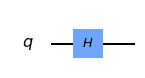

In [2]:
from qiskit import QuantumCircuit
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.draw()

# Simulate the quantum circuit

### 1. Get statevector starting with $\vert0\rangle$

$$H\vert0\rangle = \frac{1}{\sqrt{2}}\left(\vert0\rangle + \vert1\rangle\right) = \vert+\rangle$$

In [3]:
from qiskit.quantum_info import Statevector

statevector = Statevector.from_instruction(mycircuit)
print(statevector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


### 2. Change the starting state

In [4]:
import numpy as np
starting_state = np.sqrt(1/2) * (
                    Statevector.from_label('0') + 
                    1j * Statevector.from_label('1')
)
starting_state

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))

In [5]:
output_state = starting_state.evolve(mycircuit)
output_state

Statevector([0.5+0.5j, 0.5-0.5j],
            dims=(2,))

### 3. Sample counts

In [6]:
counts = output_state.sample_counts(10000)
print(counts)

{'0': 4985, '1': 5015}


# Superposition, interference and entanglement

### Superposition

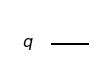

In [7]:
mycircuit = QuantumCircuit(1)
mycircuit.draw()

In [8]:
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(1000)

In [9]:
from qiskit.visualization import *

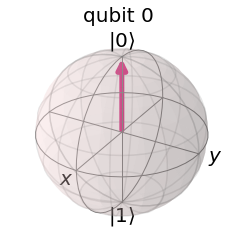

In [10]:
plot_bloch_multivector(statevector.data)

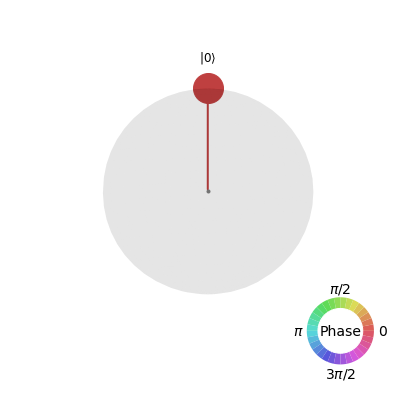

In [11]:
plot_state_qsphere(statevector.data)

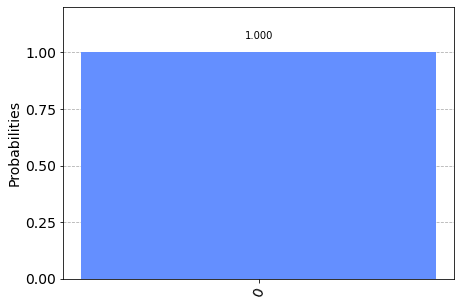

In [12]:
plot_histogram(counts)

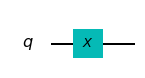

In [13]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)

mycircuit.draw()

In [14]:
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

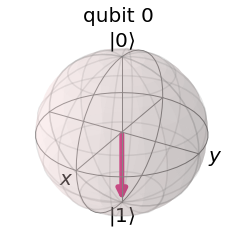

In [15]:
plot_bloch_multivector(statevector.data)

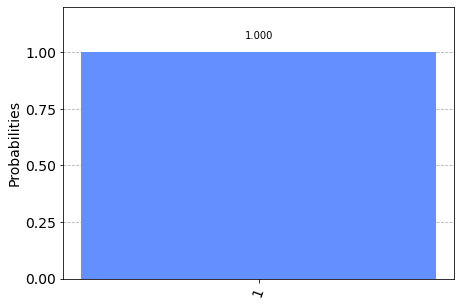

In [16]:
plot_histogram(counts)

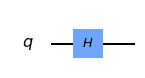

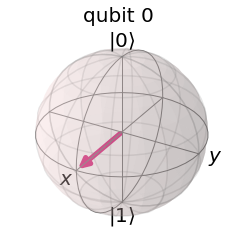

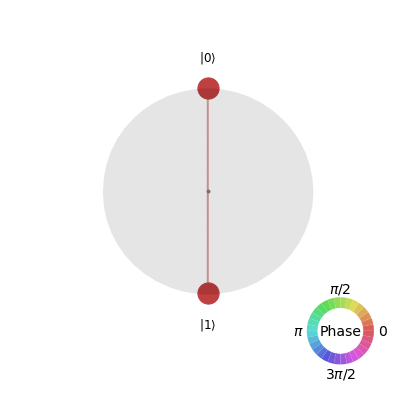

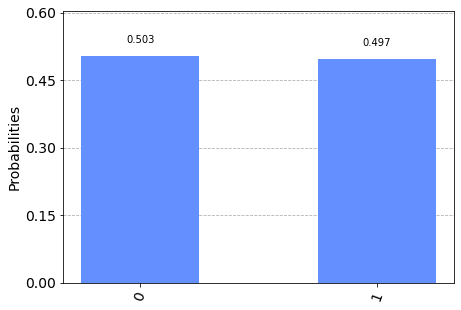

In [17]:
mycircuit = QuantumCircuit(1)
mycircuit.h(0)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_bloch_multivector(statevector.data))
display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

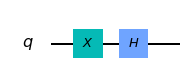

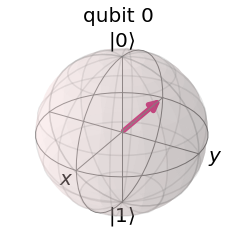

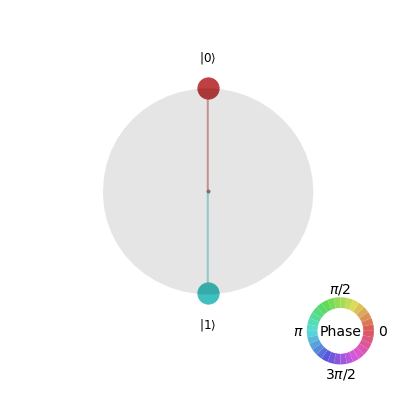

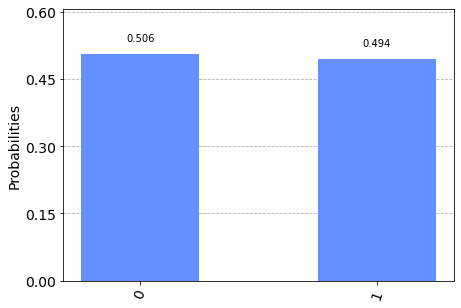

In [18]:
mycircuit = QuantumCircuit(1)
mycircuit.x(0)
mycircuit.h(0)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_bloch_multivector(statevector.data))
display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

### Interference

![image](interference.png)

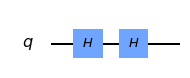

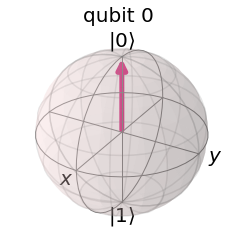

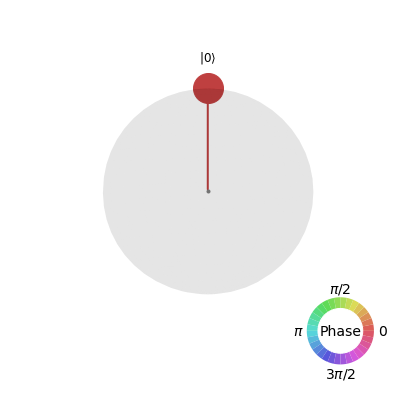

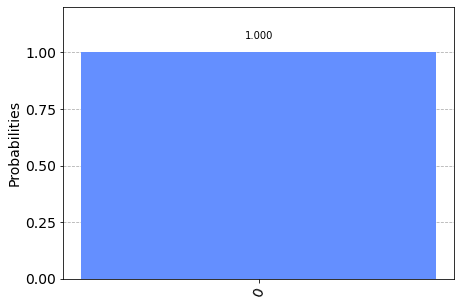

In [19]:
mycircuit = QuantumCircuit(1)
mycircuit.h(0)
mycircuit.h(0)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_bloch_multivector(statevector.data))
display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

### Two-qubit circuit

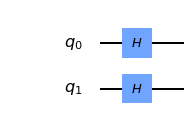

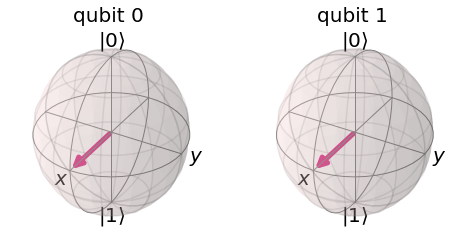

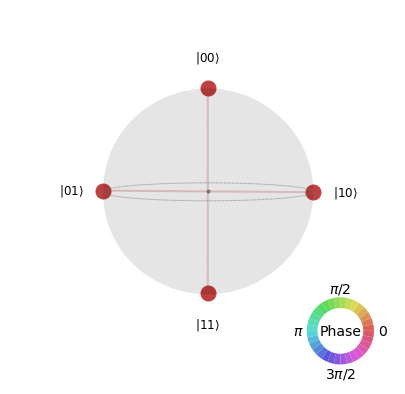

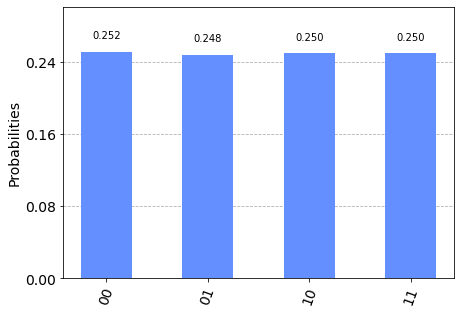

In [20]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.h(1)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_bloch_multivector(statevector.data))
display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

### Entanglement

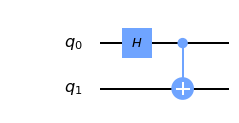

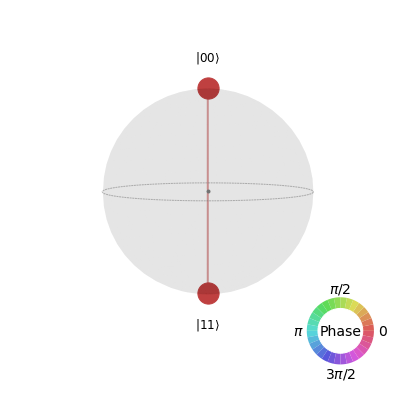

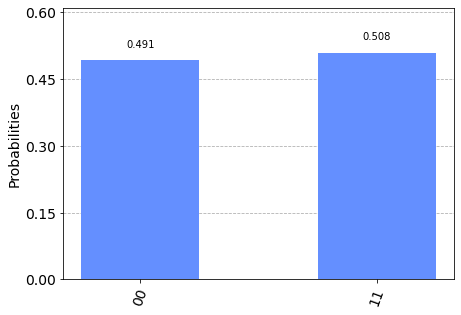

In [21]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

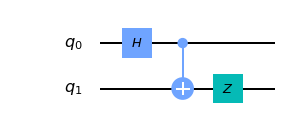

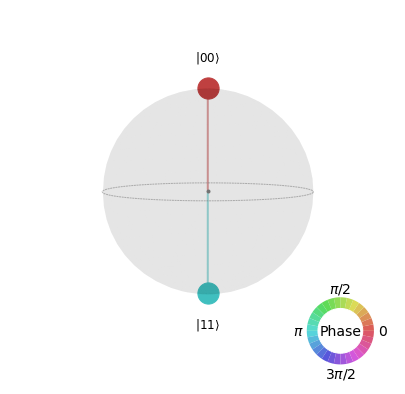

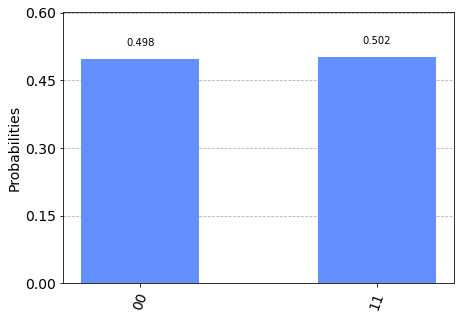

In [22]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.z(1)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

# Running quantum circuits on real devices

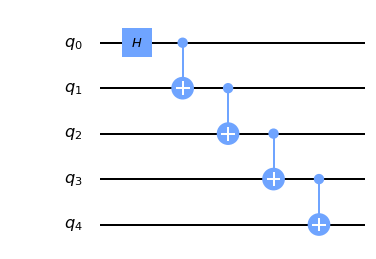

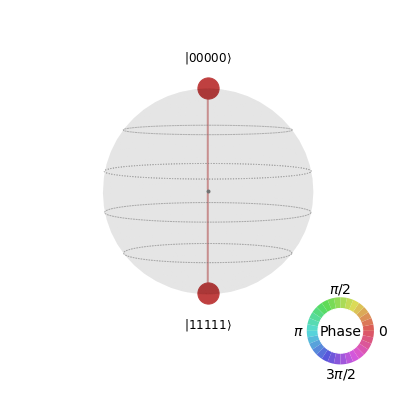

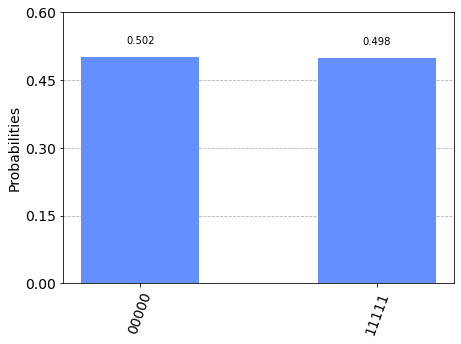

In [23]:
mycircuit = QuantumCircuit(5)
mycircuit.h(0)

for i in range(4):
    mycircuit.cx(i,i+1)

display(mycircuit.draw())
statevector = Statevector.from_instruction(mycircuit)
counts = statevector.sample_counts(shots=10000)

display(plot_state_qsphere(statevector.data))
display(plot_histogram(counts))

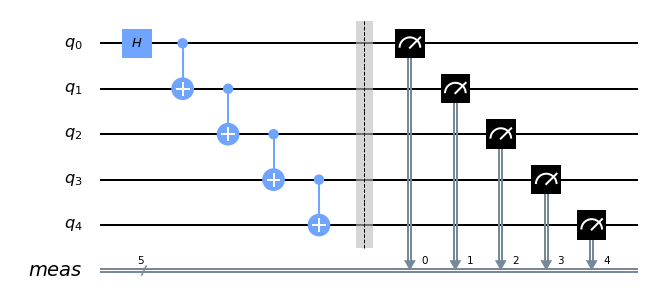

In [24]:
mycircuit.measure_all()
mycircuit.draw()

### Picking a provider and backend

In [25]:
from qiskit import IBMQ, execute

provider = IBMQ.load_account()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [26]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-community', group='reservations', project='main')
provider.backends()

ibmqfactory.load_account:WARNING:2020-06-15 10:45:10,390: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-community', group='reservations', project='main')>]

In [27]:
quantum_system = provider.get_backend('ibmq_valencia')

In [28]:
from qiskit.tools.jupyter import *

In [29]:
quantum_system

<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-community', group='reservations', project='main')>

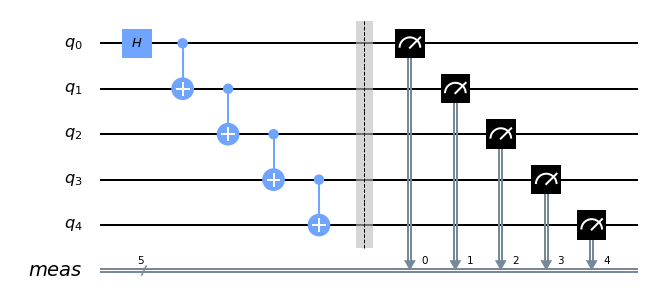

In [30]:
mycircuit.draw()

In [31]:
from qiskit.tools.monitor import *

job = execute(mycircuit, backend=quantum_system, shots=1000)
job_monitor(job)

Job Status: job has successfully run


In [32]:
counts = job.result().get_counts(mycircuit)

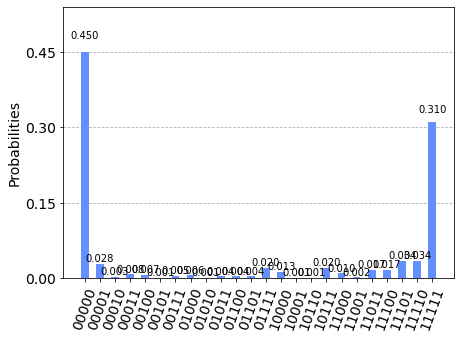

In [33]:
plot_histogram(counts)

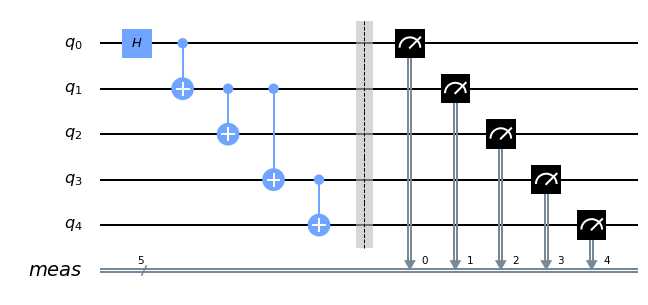

In [34]:
mycircuit = QuantumCircuit(5)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.cx(1,2)
mycircuit.cx(1,3)
mycircuit.cx(3,4)
mycircuit.measure_all()
mycircuit.draw()

In [35]:
job = execute(mycircuit, backend=quantum_system, shots=1000, initial_layout=[0,1,2,3,4])
job_monitor(job)

Job Status: job has successfully run


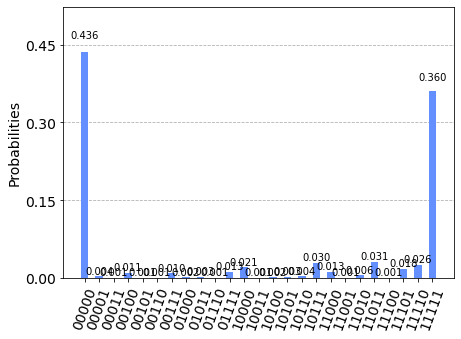

In [36]:
counts = job.result().get_counts(mycircuit)
plot_histogram(counts)

![image](executeflow.png)

In [37]:
from qiskit import transpile, assemble

In [38]:
mycircuit = QuantumCircuit(5)
mycircuit.h(0)

for i in range(4):
    mycircuit.cx(i,i+1)

mycircuit.measure_all()

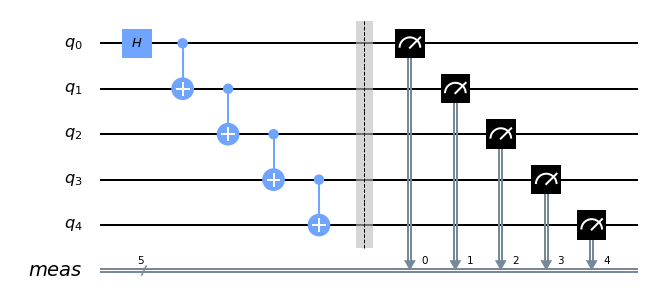

In [39]:
mycircuit.draw()

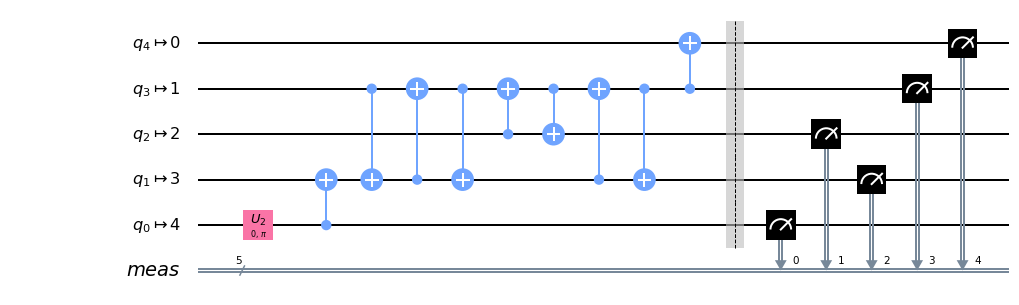

In [40]:
transpiled = transpile(mycircuit, quantum_system)
transpiled.draw()

In [41]:
quantum_system

<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-community', group='reservations', project='main')>

In [42]:
qobj = assemble(transpiled, shots=1000)

In [43]:
job = quantum_system.run(qobj)

In [44]:
job_monitor(job)

Job Status: job has successfully run


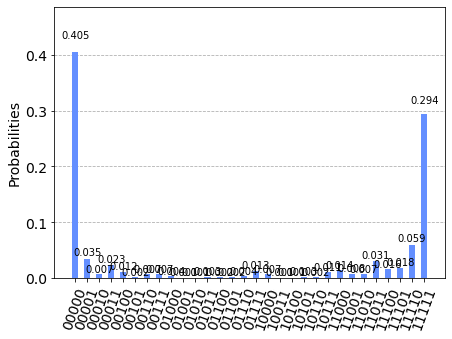

In [45]:
counts = job.result().get_counts(transpiled)
plot_histogram(counts)

https://qiskit.org/documentation/tutorials/circuits_advanced/4_transpiler_passes_and_passmanager.html?highlight=optimization%20level

**optimization_level=0:** just maps the circuit to the backend, with no explicit optimization (except whatever optimizations the mapper does).

**optimization_level=1:** maps the circuit, but also does light-weight optimizations by collapsing adjacent gates.

**optimization_level=2:** medium-weight optimization, including a noise-adaptive layout and a gate-cancellation procedure based on gate commutation relationships.

**optimization_level=3:** heavy-weight optimization, which in addition to previous steps, does resynthesis of two-qubit blocks of gates in the circuit.

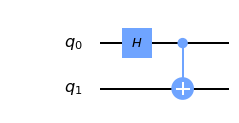

In [46]:
mycircuit = QuantumCircuit(2)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.draw()

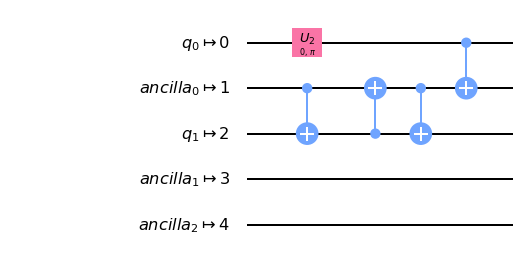

In [47]:
transpile(mycircuit, quantum_system, initial_layout=[0,2]).draw()

# Other types of simulations

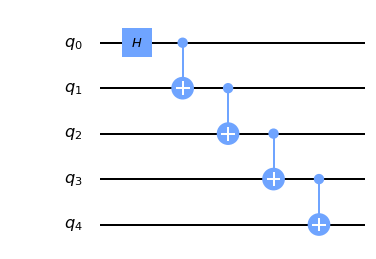

In [48]:
mycircuit = QuantumCircuit(5)
mycircuit.h(0)

for i in range(4):
    mycircuit.cx(i, i+1)

mycircuit.draw()

In [49]:
from qiskit.quantum_info import Operator
op = Operator(mycircuit)

In [50]:
print(op)

Operator([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))


In [51]:
unitary = Operator.from_label('ZZZZZ')
unitary.compose(mycircuit, [0,1,2,3,4])

Operator([[ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j, -0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          ...,
          [ 0.        +0.j,  0.        +0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.        +0.j,  0.        +0.j, -0.70710678+0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j],
          [ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j, ...,
            0.        +0.j,  0.        +0.j,  0.        +0.j]],
         input_dims=(2, 2, 2, 2, 2), output_dims=(2, 2, 2, 2, 2))

# Qiskit Circuit library

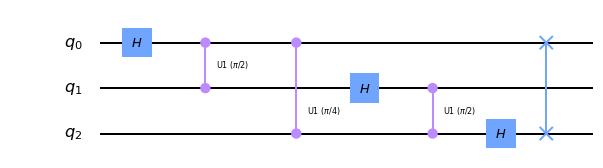

In [52]:
from qiskit.circuit.library import QFT
mycircuit = QFT(3)
mycircuit.draw()

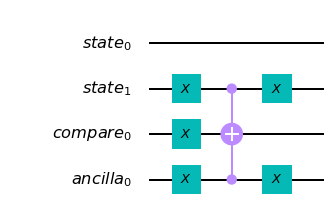

In [53]:
from qiskit.circuit.library import IntegerComparator
mycircuit = IntegerComparator(num_state_qubits=2, value = 2)
mycircuit.draw()

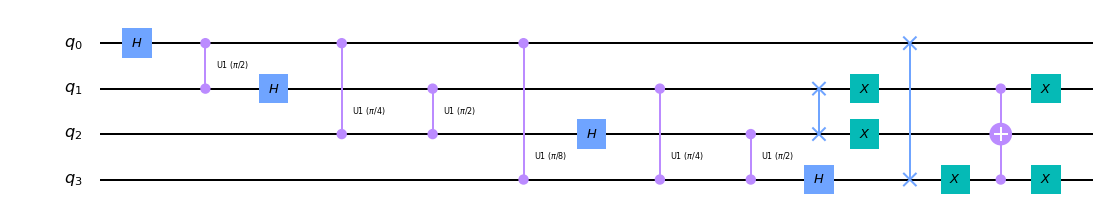

In [54]:
QFT(4).compose(IntegerComparator(num_state_qubits=2, value = 2), [0,1,2,3]).draw()